### Score: 27

Q1.[7]

Q2.[11+9]

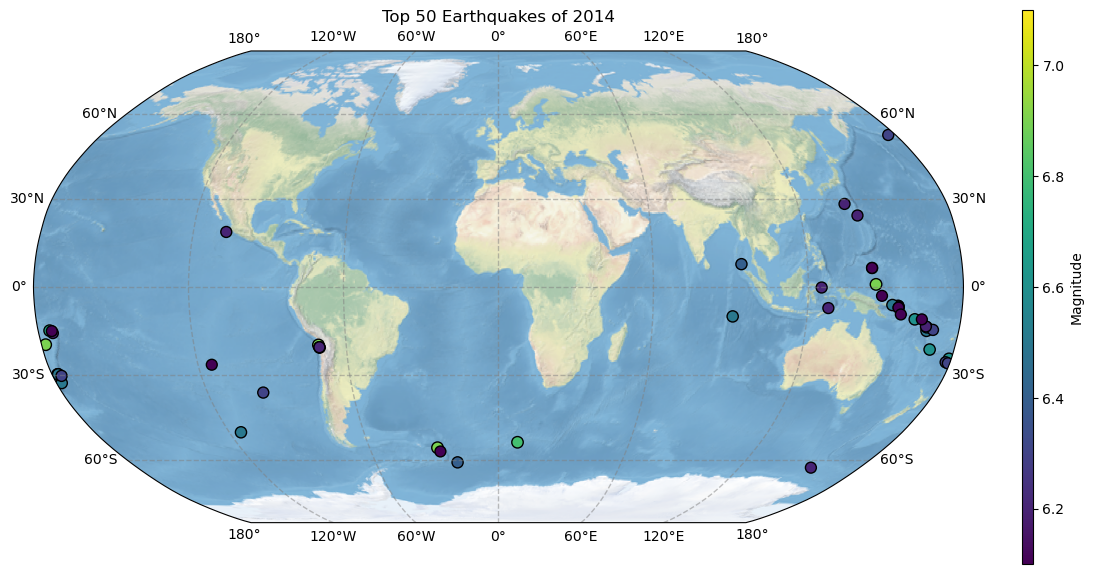

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

df = pd.read_csv('usgs_earthquakes.csv')
df = df.dropna(subset=['mag', 'updated']) # 清理数据：删除NaN的行
df['updated'] = pd.to_datetime(df['updated'])
df_2014 = df[df['updated'].dt.year == 2014]
df_sorted = df_2014.sort_values(by='mag', ascending=False)
df_top50 = df_sorted.head(50)

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.set_title('Top 50 Earthquakes of 2014')
ax.stock_img()

scale_factor = 10  # 缩放因子
sizes = (df_top50['mag'] ) * scale_factor
 
scatter = ax.scatter(df_top50['longitude'], df_top50['latitude'], c=df_top50['mag'], s=sizes, cmap='viridis', edgecolor='black', transform=ccrs.Geodetic())
 
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.05, aspect=50, shrink=0.9)
cbar.set_label('Magnitude')
 
ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5, linewidth=1)
 # NOTE: 投影中心、颜色映射和颜色条刻度应与例图一致 -3
plt.show()

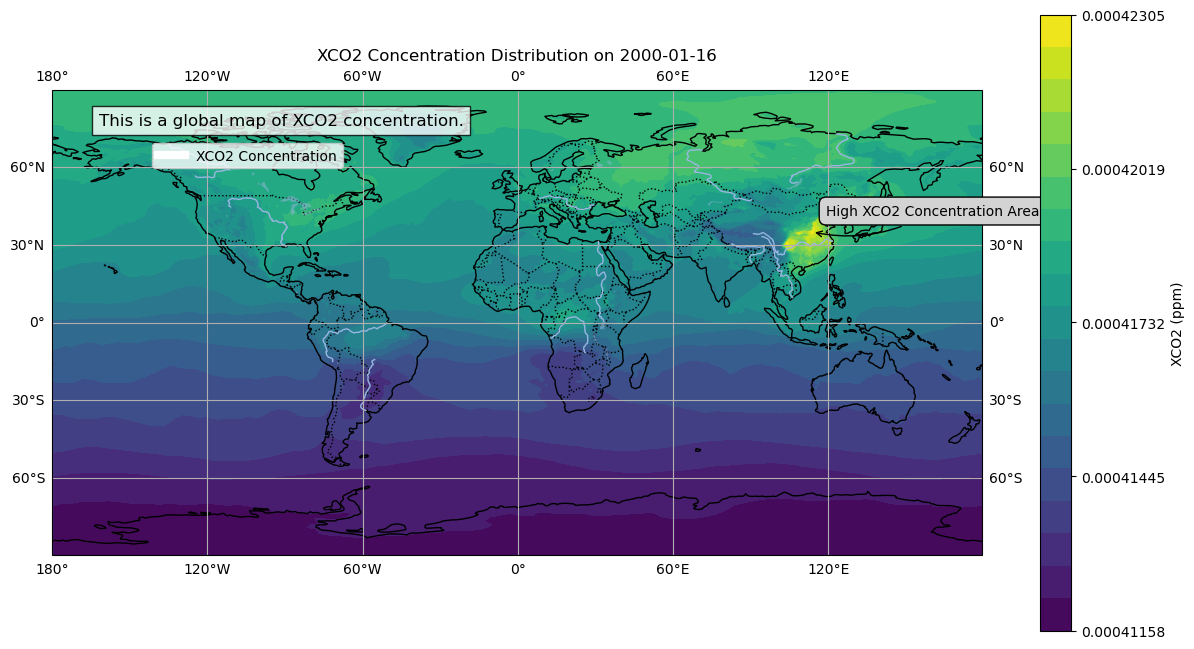

In [9]:
import os
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter

 
data_path = 'D:/ESE/oco2' 
data_dict = {}
 
# 循环读取所有nc4文件
for filename in os.listdir(data_path):
    if filename.endswith('.nc4'):
        file_path = os.path.join(data_path, filename)
        dataset = nc.Dataset(file_path)
        try:
            time_var = dataset.variables['time'][:]
            xco2_var = dataset.variables['XCO2'][:, :, :] 
            lat_var = dataset.variables['lat'][:]
            lon_var = dataset.variables['lon'][:]
        except KeyError as e:
            print(f"Error reading {filename}: {e}")
            continue
            
        selected_time_index = 0 
        xco2_data = xco2_var[selected_time_index, :, :]  # 选择第一个时间点的数据进行绘图
        base_date = pd.Timestamp('2000-01-01')
        selected_date = pd.to_datetime(base_date + pd.to_timedelta(time_var[selected_time_index], unit='D'))
        data_dict[selected_date] = (xco2_data, lat_var, lon_var)
 
# 选择字典中的第一个日期进行绘图
selected_date = list(data_dict.keys())[0]
xco2_data, lat_data, lon_data = data_dict[selected_date]

# 添加project
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})
 
# 添加feature
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
 
levels = np.linspace(np.min(xco2_data), np.max(xco2_data), 20) 
contour_set = ax.contourf(lon_data, lat_data, xco2_data, levels=levels, transform=ccrs.PlateCarree(), cmap='viridis')
 
# 添加colorbar
cbar = fig.colorbar(contour_set, ax=ax, orientation='vertical', label='XCO2 (ppm)')
cbar.set_ticks(np.linspace(np.min(xco2_data), np.max(xco2_data), 5))  # 设置颜色条的刻度
 
# 设置x label and ticks, y label and ticks, title
ax.set_title(f'XCO2 Concentration Distribution on {selected_date.date()}')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.tick_params(axis='both', which='major', labelsize=12, labelcolor='black')
 
# 添加gridlines
ax.gridlines(draw_labels=True)
 
# 添加legend
legend_labels = ['XCO2 Concentration']
legend_handles = [plt.Line2D([0], [0], color='w', lw=6, label=labels) for labels in legend_labels]
legend = ax.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.1, 0.9))

# 查找最大CO2浓度及其位置
max_xco2_value = np.max(xco2_data)
max_index = np.unravel_index(np.argmax(xco2_data), xco2_data.shape)
max_lat = lat_data[max_index[0]]
max_lon = lon_data[max_index[1]]
 
# 添加annotations
ax.annotate('High XCO2 Concentration Area', xy=(max_lon, max_lat), xytext=(10, 10),
            textcoords='offset points', ha='left', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='lightgrey'),
            arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=-0.2"))
 
# 添加text box
text_box = ax.text(0.05, 0.95, 'This is a global map of XCO2 concentration.', transform=ax.transAxes, fontsize=12,
                   verticalalignment='top', bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
 
plt.show()

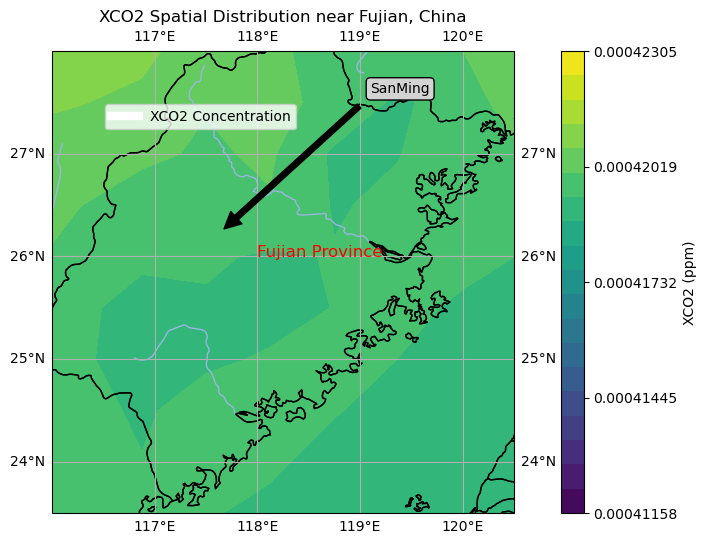

In [21]:
# 添加project
# NOTE: 应使用与2.1不同的投影方式 -1
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
 
# 设置经纬度范围（福建省附近）
min_lon, max_lon = 116.0, 120.5
min_lat, max_lat = 23.5, 28.0
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)
 
# 添加feature
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES, linestyle='-')

levels = np.linspace(np.min(xco2_data), np.max(xco2_data), 20) 
contour_set = ax.contourf(lon_data, lat_data, xco2_data, levels=levels, transform=ccrs.PlateCarree(), cmap='viridis')
 
# 添加colorbar
cbar = fig.colorbar(contour_set, ax=ax, orientation='vertical', label='XCO2 (ppm)')
cbar.set_ticks(np.linspace(np.min(xco2_data), np.max(xco2_data), 5))
 
# 添加title
plt.title('XCO2 Spatial Distribution near Fujian, China')

# 添加gridlines
ax.gridlines(draw_labels=True)

# 设置x label and ticks, y label and ticks
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.tick_params(axis='both', which='major', labelsize=12, labelcolor='black')

# 添加text box
ax.text(118.0, 26.0, 'Fujian Province', transform=ccrs.PlateCarree(), fontsize=12, color='red')

# 添加annotations
SanMing_lon, SanMing_lat = 117.6, 26.2
annotation = ax.annotate('SanMing', xy=(SanMing_lon, SanMing_lat), xytext=(SanMing_lon + 1.5, SanMing_lat + 1.5),
                         arrowprops=dict(facecolor='black', shrink=0.05),
                         bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgrey'),
                         horizontalalignment='left', verticalalignment='top', transform=ccrs.PlateCarree())

# 添加legend
legend_labels = ['XCO2 Concentration']
legend_handles = [plt.Line2D([0], [0], color='w', lw=6, label=labels) for labels in legend_labels]
legend = ax.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()